<a href="https://colab.research.google.com/github/Gaukhar-ai/Gaukhar.Diamond.github/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/datas/airbnb/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

In [4]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6397
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1132
reviews_per_month                 1132
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
df = df.drop(columns=['neighbourhood_group'])
df = df.fillna(0)

In [6]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.492300,-0.117706,0.087938,0.011445,0.003843,-0.517447,-0.155578,0.209033,-0.030511
host_id,0.492300,1.000000,-0.121773,0.042367,0.018258,-0.040331,-0.230197,-0.039970,-0.002984,-0.002913
latitude,-0.117706,-0.121773,1.000000,-0.514181,0.033738,-0.013178,0.062135,0.048072,-0.052768,-0.055038
longitude,0.087938,0.042367,-0.514181,1.000000,0.050069,0.104196,-0.092628,-0.097239,0.207324,0.047892
price,0.011445,0.018258,0.033738,0.050069,1.000000,0.007402,-0.060551,-0.072857,-0.008996,0.045761
minimum_nights,0.003843,-0.040331,-0.013178,0.104196,0.007402,1.000000,-0.126540,-0.182752,0.212230,0.157415
number_of_reviews,-0.517447,-0.230197,0.062135,-0.092628,-0.060551,-0.126540,1.000000,0.738811,-0.153455,0.012790
reviews_per_month,-0.155578,-0.039970,0.048072,-0.097239,-0.072857,-0.182752,0.738811,1.000000,-0.157969,-0.013999
calculated_host_listings_count,0.209033,-0.002984,-0.052768,0.207324,-0.008996,0.212230,-0.153455,-0.157969,1.000000,0.191762
availability_365,-0.030511,-0.002913,-0.055038,0.047892,0.045761,0.157415,0.012790,-0.013999,0.191762,1.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6397.0,2.813857e+07,1.288337e+07,2384.00000,1.875555e+07,2.994743e+07,3.959279e+07,4.551558e+07
host_id,6397.0,9.850262e+07,9.990222e+07,2140.00000,1.705221e+07,5.738786e+07,1.580558e+08,3.679071e+08
latitude,6397.0,4.189905e+01,5.892851e-02,41.64736,4.187274e+01,4.190186e+01,4.193978e+01,4.202251e+01
longitude,6397.0,-8.766404e+01,4.241434e-02,-87.84681,-8.768746e+01,-8.766088e+01,-8.763316e+01,-8.753752e+01
price,6397.0,1.530200e+02,3.762077e+02,0.00000,6.400000e+01,9.900000e+01,1.550000e+02,1.000000e+04
minimum_nights,6397.0,8.113178e+00,2.278686e+01,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+02
number_of_reviews,6397.0,4.275379e+01,6.705161e+01,0.00000,2.000000e+00,1.500000e+01,5.600000e+01,6.320000e+02
reviews_per_month,6397.0,1.436439e+00,1.717909e+00,0.00000,1.500000e-01,8.500000e-01,2.220000e+00,3.243000e+01
calculated_host_listings_count,6397.0,1.359872e+01,3.718057e+01,1.00000,1.000000e+00,2.000000e+00,7.000000e+00,2.050000e+02
availability_365,6397.0,1.742722e+02,1.388776e+02,0.00000,3.600000e+01,1.610000e+02,3.290000e+02,3.650000e+02


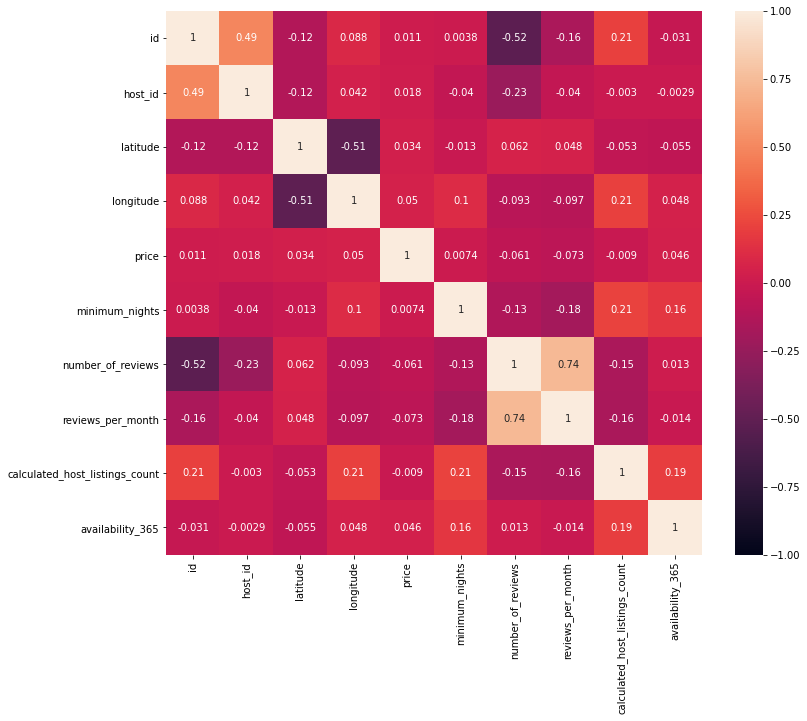

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()


In [9]:
#df['id'].corr(df['host_id'])

number of reviews and reviews per month have high correlations, check the number of items in each and drop the least one.

In [10]:
df['number_of_reviews'].nunique()

335

In [11]:
df['reviews_per_month'].nunique()

666

In [12]:
df['host_id'].nunique()

3540

In [13]:
df['id'].nunique()

6397

In [14]:
df = df.drop(columns= ['host_id', 'number_of_reviews'])

In [15]:
df.head()

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",Rebecca,Hyde Park,41.78790,-87.58780,Private room,60,2,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,Craig & Kathleen,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,Sarah,West Town,41.90289,-87.68182,Entire home/apt,60,2,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,Lois,Hyde Park,41.79612,-87.59261,Private room,21,1,2020-02-14,0.61,5,168


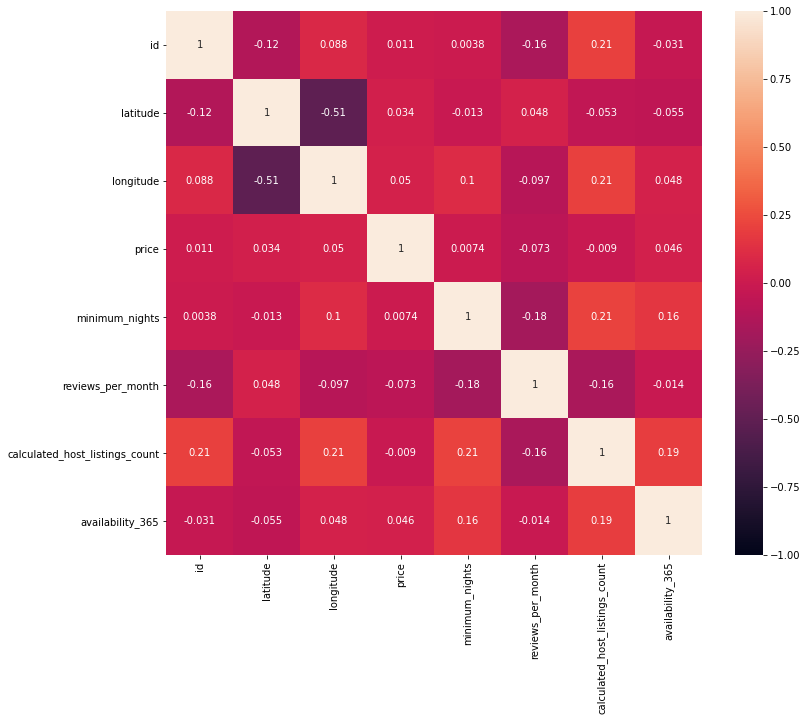

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()


In [17]:
df.sort_values(by='price', ascending=False).head(50)

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
648,8053583,Single Bedroom in Wicker Park Modern Mansion,Kristina,West Town,41.90800,-87.67366,Private room,10000,20,2019-06-16,0.49,1,358
4146,36668235,Steps from Mag Mile - 2 Queen Beds Boutique Hotel,St Jane,Loop,41.88621,-87.62385,Hotel room,9999,1,2020-03-10,1.59,3,173
1707,19643452,Large 1 bedroom with Private Bath,Kyle,Lake View,41.93917,-87.64982,Private room,9999,80,2017-08-08,0.05,1,363
4145,36668214,Steps from Mag Mile -Suite in Boutique Hotel,St Jane,Loop,41.88607,-87.62443,Hotel room,9999,1,2019-08-25,0.22,3,173
4144,36667074,Steps from Mag Mile - King Bed Boutique Hotel,St Jane,Loop,41.88714,-87.62413,Hotel room,9999,1,2020-03-22,2.27,3,168
1245,15287352,Wrigleyville Mansion - Sleeps 16+,Joe,Lake View,41.95112,-87.67020,Entire home/apt,9999,7,2018-11-23,0.40,2,80
3938,35421741,"BIG Unit, Wrigleyville, Step to Wrigley, Metro",Harry,Lake View,41.95100,-87.65785,Entire home/apt,9000,2,0,0.00,1,365
5558,42566731,"The Robey, Urban King Accessible",The Robey Hotel,West Town,41.91142,-87.67735,Private room,7000,1,0,0.00,8,365
3589,33251879,Furnished Lux Monthly Rental Heart of E. Lakeview,Mark,Lake View,41.94458,-87.64674,Entire home/apt,3690,31,0,0.00,2,88
1468,17506473,Spacious Classy Condo 3 mi. from Wrigley,Anna,Irving Park,41.96032,-87.70980,Entire home/apt,3429,20,2017-08-06,0.30,2,83


In [18]:
df.sort_values(by='price', ascending=True).head(30)

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5722,43078540,Found Hotel Chicago River North,Found Hotel Chicago River North,Near North Side,41.89288,-87.63377,Hotel room,0,1,0,0.00,1,0
3197,29942397,Go Cubs Go!,Jeannie And Paul,Lincoln Park,41.92860,-87.66460,Entire home/apt,10,2,2020-03-12,0.98,3,257
1522,18154959,Cozy Chicago Vintage Rowhouse,Kevin,Pullman,41.68664,-87.60764,Private room,10,2,2018-11-24,0.68,1,0
4103,36452514,United Center Living Room,Emrah,Near West Side,41.88074,-87.68164,Shared room,10,1,2020-08-28,0.49,4,324
6377,45487005,OFFICE SPACE ONLY - Private Modern Backyard St...,Shane,Logan Square,41.91875,-87.70092,Entire home/apt,10,180,0,0.00,1,360
5867,43701546,911 s carpenter street,Akshay,Near West Side,41.86948,-87.65199,Private room,12,30,0,0.00,1,0
2598,25973971,D. MANSION SHARED BEDROOM BED_D TOP BUNK,Francineuma Vitoriano Dos Santos,Calumet Heights,41.72839,-87.57875,Shared room,13,1,2020-08-31,2.13,12,325
2630,26162767,F. MANSION SHARED BEDROOM 4-BED F_TOP BUNK,Francineuma Vitoriano Dos Santos,Calumet Heights,41.72830,-87.57841,Shared room,14,1,2020-06-19,0.96,12,337
2686,26629261,B. MANSION SHARED BEDROOM 4-BED B_TOP BUNK,Francineuma Vitoriano Dos Santos,Calumet Heights,41.72945,-87.57811,Shared room,14,1,2020-09-04,1.87,12,353
4561,38707430,WC1 GREAT VALUE PRIME LOCATION COMFY BED,William,Bridgeport,41.84005,-87.64923,Shared room,15,2,2020-01-14,0.58,1,153


In [19]:
df['price'].min()

0

In [20]:
df['price'].max()

10000

In [21]:
df['price'].value_counts()

50      139
75      138
80      132
150     124
100     117
       ... 
893       1
861       1
2788      1
713       1
0         1
Name: price, Length: 500, dtype: int64

In [22]:
#adjust the prices: no more than 3000 and no less than 19
df=df[df['price']<2000]
df = df[df['price']>19]

In [23]:
df.head()

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",Rebecca,Hyde Park,41.78790,-87.58780,Private room,60,2,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,Craig & Kathleen,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,Sarah,West Town,41.90289,-87.68182,Entire home/apt,60,2,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,Lois,Hyde Park,41.79612,-87.59261,Private room,21,1,2020-02-14,0.61,5,168


In [24]:
df['price'].value_counts()

50      139
75      138
80      132
150     124
100     117
       ... 
893       1
861       1
713       1
693       1
1153      1
Name: price, Length: 478, dtype: int64

In [25]:
#minimum nights not more than 30 is reasonable
df=df[df['minimum_nights']<30]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5533 entries, 0 to 6396
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5533 non-null   int64  
 1   name                            5533 non-null   object 
 2   host_name                       5533 non-null   object 
 3   neighbourhood                   5533 non-null   object 
 4   latitude                        5533 non-null   float64
 5   longitude                       5533 non-null   float64
 6   room_type                       5533 non-null   object 
 7   price                           5533 non-null   int64  
 8   minimum_nights                  5533 non-null   int64  
 9   last_review                     5533 non-null   object 
 10  reviews_per_month               5533 non-null   float64
 11  calculated_host_listings_count  5533 non-null   int64  
 12  availability_365                55

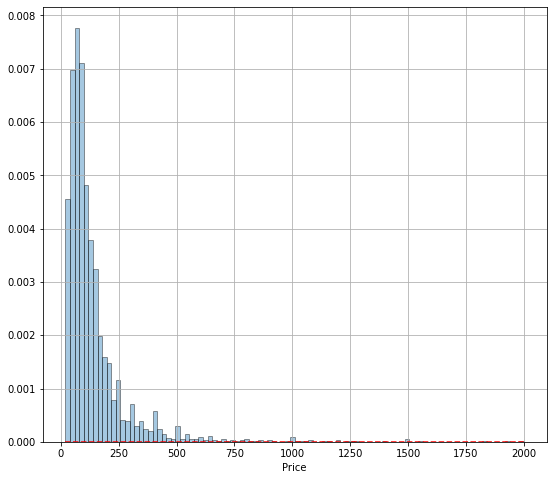

,count,mean,std,min,25%,50%,75%,max
price,5533.0,138.968372,150.099641,20.0,62.0,96.0,154.0,1999.0


In [27]:
import matplotlib.mlab as mlab
from scipy.stats import norm
plt.figure(figsize=(10,8))

#mean distribution
md = df['price'].mean()

#std distrib-n
sigma = df['price'].std()
num_bins=100

num_bins = 100
n, bins, pathces = plt.hist(df['price'], num_bins, density=True,
                            edgecolor = 'black', lw=1, alpha=.40)
y=norm.pdf(bins, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Price')

#prevent clipping
plt.subplots_adjust(left=.20)
plt.grid()
plt.show()
df.describe()[['price']].transpose()

Very interesting results, I still think the pricing depends on the number of rooms, location and reviews. Should see where the prices are high, what are the criterias for the pricing. I should lower the max price. 

In [33]:
df=df[df['price']<250]
df = df[df['price']>19]

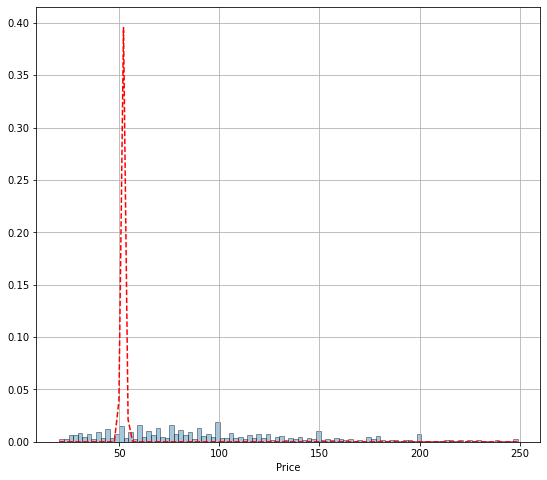

,count,mean,std,min,25%,50%,75%,max
price,4889.0,98.138474,51.925292,20.0,59.0,88.0,128.0,249.0


In [34]:
import matplotlib.mlab as mlab
from scipy.stats import norm
plt.figure(figsize=(10,8))

#mean distribution
md = df['price'].mean()

#std distrib-n
sigma = df['price'].std()
num_bins=100

num_bins = 100
n, bins, pathces = plt.hist(df['price'], num_bins, density=True,
                            edgecolor = 'black', lw=1, alpha=.40)
y=norm.pdf(bins, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Price')

#prevent clipping
plt.subplots_adjust(left=.20)
plt.grid()
plt.show()
df.describe()[['price']].transpose()

so 923 listings are over $200, 1/3 of all the listings. Probably whole houses or luxury rooms. 

More things to look at are: 
1. price range for the private room. 
2. Price range for the houses. 
3. locations for the rooms
4. locations for the houses 

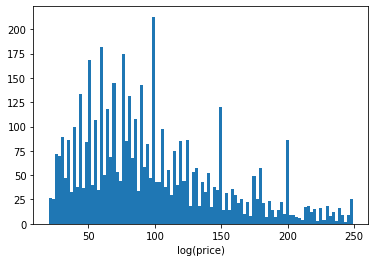

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


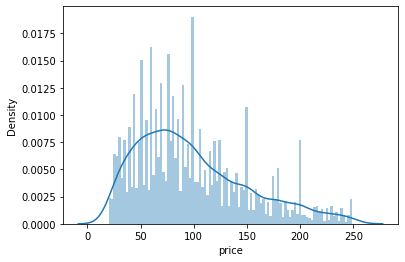

In [35]:
df['log_price'] = np.log(df['price'].values+1)
plt.hist(df['price'].values, bins=100)
plt.xlabel('log(price)')
plt.show()
sns.distplot(df['price'], bins=100)

In [36]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [37]:
df['room_type'].sum()

'Private roomEntire home/aptEntire home/aptEntire home/aptPrivate roomEntire home/aptEntire home/aptEntire home/aptPrivate roomPrivate roomPrivate roomPrivate roomPrivate roomPrivate roomPrivate roomEntire home/aptEntire home/aptEntire home/aptEntire home/aptPrivate roomEntire home/aptPrivate roomEntire home/aptEntire home/aptPrivate roomPrivate roomPrivate roomEntire home/aptPrivate roomPrivate roomEntire home/aptPrivate roomEntire home/aptEntire home/aptPrivate roomEntire home/aptEntire home/aptEntire home/aptEntire home/aptPrivate roomEntire home/aptShared roomEntire home/aptPrivate roomEntire home/aptPrivate roomEntire home/aptEntire home/aptPrivate roomPrivate roomShared roomPrivate roomPrivate roomPrivate roomEntire home/aptHotel roomPrivate roomPrivate roomPrivate roomPrivate roomPrivate roomEntire home/aptPrivate roomEntire home/aptEntire home/aptEntire home/aptEntire home/aptPrivate roomEntire home/aptEntire home/aptEntire home/aptPrivate roomPrivate roomEntire home/aptPrivate

In [38]:
#!pip install joypy

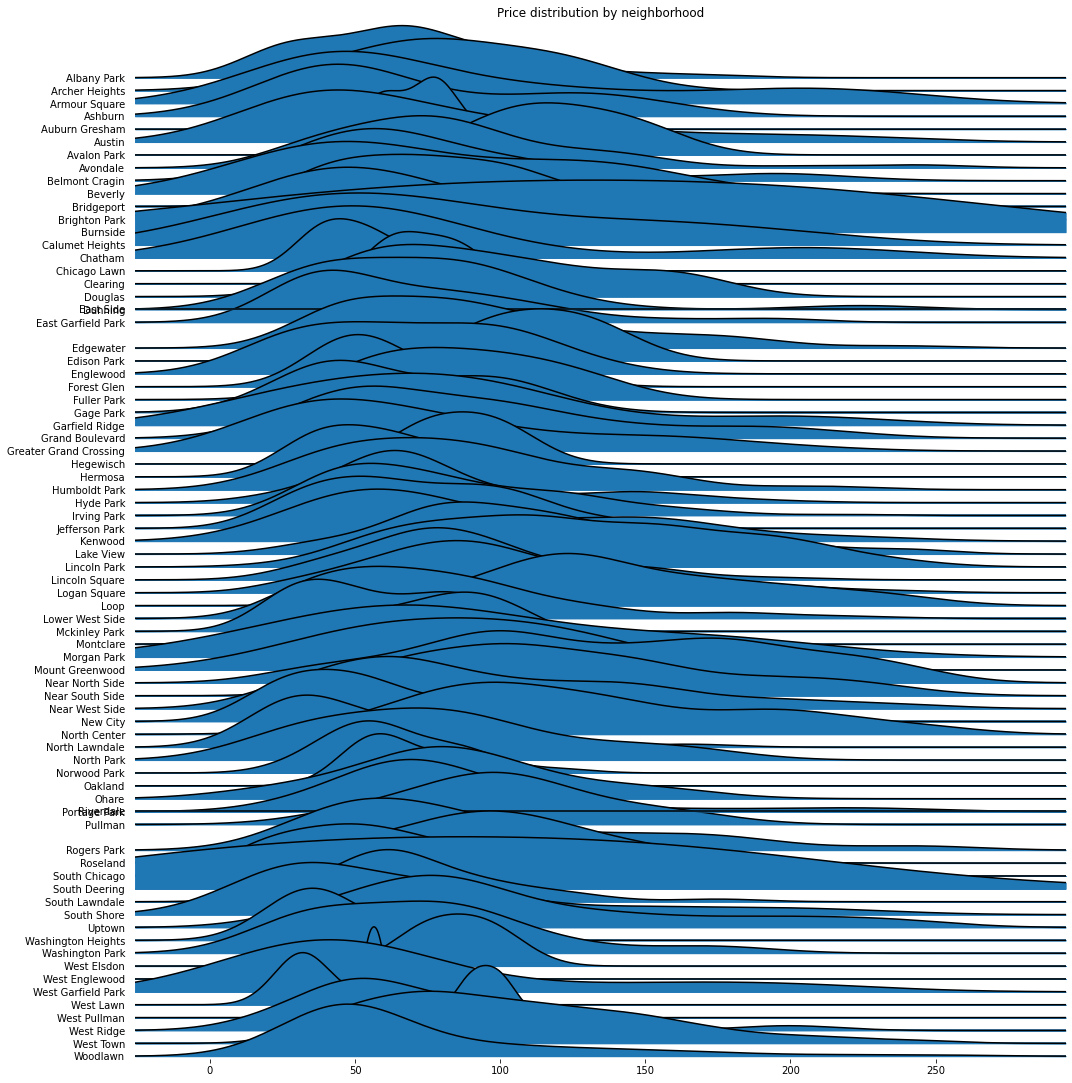

In [45]:
import joypy
fig, axes = joypy.joyplot(df, column=['price'], by='neighbourhood', 
                          ylim='own', figsize=(15,15))
plt.title('Price distribution by neighborhood')
plt.show()

wow, lol, this is crazy! let's find some other way to look at it. Although this is a priceless information for investors and business owners. 